In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


<Axes: >

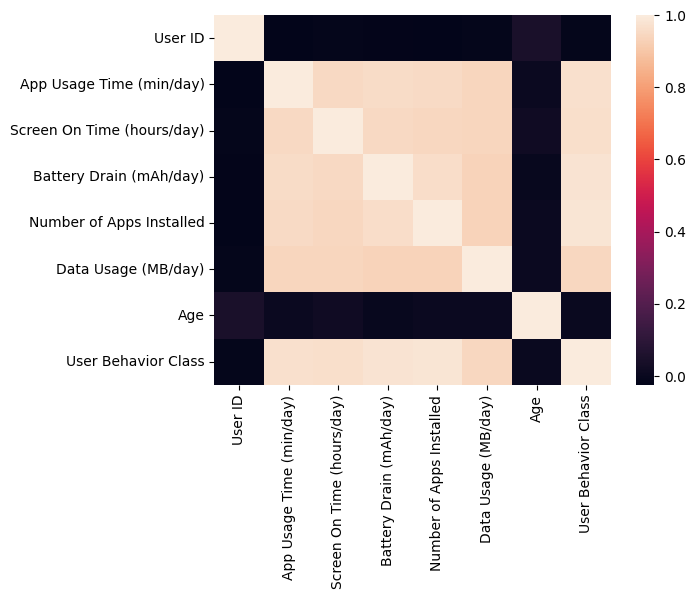

In [ ]:
sns.heatmap(df.corr(numeric_only=True)) #positive correlations are represented by
#warm colors(light colors) while negative correlations are represented by cool colors(dark colors).

In [ ]:
df.drop(['User ID','Age'],axis=1,inplace=True)
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,Female,3
...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,Male,1


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Gender,0
User Behavior Class,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Gender                      700 non-null    object 
 8   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 49.3+ KB


In [ ]:
df['Device Model'].value_counts()

,count
Device Model,
Xiaomi Mi 11,146
iPhone 12,146
Google Pixel 5,142
OnePlus 9,133
Samsung Galaxy S21,133


In [ ]:
df['Operating System'].value_counts()

,count
Operating System,
Android,554
iOS,146


In [ ]:
df['User Behavior Class'].value_counts() #This is a balanced dataset.

,count
User Behavior Class,
2,146
3,143
4,139
5,136
1,136


In [ ]:
df_dev_model_encoded=pd.get_dummies(df['Device Model'],drop_first=True,dtype=int)
df_dev_model_encoded

,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12
0,0,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,0,1
...,...,...,...,...
695,0,0,0,1
696,0,0,1,0
697,0,0,0,0
698,0,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Operating System']=le.fit_transform(df['Operating System'])
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
df=pd.concat([df,df_dev_model_encoded],axis=1)
df.drop('Device Model',axis=1,inplace=True)
df

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Gender,User Behavior Class,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12
0,0,393,6.4,1872,67,1122,1,4,0,0,0,0
1,0,268,4.7,1331,42,944,0,3,1,0,0,0
2,0,154,4.0,761,32,322,1,2,0,0,1,0
3,0,239,4.8,1676,56,871,1,3,0,0,0,0
4,1,187,4.3,1367,58,988,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,92,3.9,1082,26,381,1,2,0,0,0,1
696,0,316,6.8,1965,68,1201,1,4,0,0,1,0
697,0,99,3.1,942,22,457,0,2,0,0,0,0
698,0,62,1.7,431,13,224,1,1,0,1,0,0


In [ ]:
popped_ele=df.pop('User Behavior Class')
df=pd.concat([df,popped_ele],axis=1)
df

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Gender,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,User Behavior Class
0,0,393,6.4,1872,67,1122,1,0,0,0,0,4
1,0,268,4.7,1331,42,944,0,1,0,0,0,3
2,0,154,4.0,761,32,322,1,0,0,1,0,2
3,0,239,4.8,1676,56,871,1,0,0,0,0,3
4,1,187,4.3,1367,58,988,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,92,3.9,1082,26,381,1,0,0,0,1,2
696,0,316,6.8,1965,68,1201,1,0,0,1,0,4
697,0,99,3.1,942,22,457,0,0,0,0,0,2
698,0,62,1.7,431,13,224,1,0,1,0,0,1


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
knn=KNeighborsClassifier(n_neighbors=9)
nb=GaussianNB()
models=[knn,nb]
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(y_pred)
  print('Confusion matrix...........')
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  print('Accuracy...........')
  accuracy=accuracy_score(y_test,y_pred)
  print(accuracy)

[4 1 2 2 3 2 2 1 4 3 1 1 2 1 2 4 5 2 3 2 5 4 3 4 4 2 3 5 2 5 1 3 1 3 4 5 5
 2 1 2 3 4 1 3 2 5 3 3 2 4 2 2 2 1 5 5 3 2 4 2 3 2 1 2 5 2 5 1 5 5 1 2 3 2
 3 2 5 4 4 4 2 1 4 2 4 4 5 2 3 1 1 4 2 3 4 2 2 1 3 5 3 3 1 2 3 4 5 1 4 4 5
 4 4 2 3 2 4 3 4 3 3 4 5 4 5 2 3 5 4 5 3 2 1 2 2 2 5 2 2 2 4 3 4 2 1 4 4 5
 2 1 1 2 3 4 4 1 4 4 5 2 5 5 1 4 2 5 2 5 3 2 4 1 5 4 3 1 4 1 5 2 3 4 2 4 1
 3 3 1 5 4 3 3 4 1 4 5 3 4 2 2 2 1 4 1 3 2 2 3 3 4]
Confusion matrix...........
[[33 13  0  0  0]
 [ 0 34  0  0  0]
 [ 0  9 40  1  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Accuracy...........
0.8904761904761904
[4 1 1 2 3 2 2 1 4 3 1 1 2 1 3 4 5 1 3 2 5 4 3 4 4 2 3 5 2 5 1 3 1 3 4 5 5
 1 1 2 3 4 1 3 2 5 3 3 1 3 2 2 2 1 5 5 3 1 4 2 3 2 1 2 5 2 5 1 5 5 1 2 3 2
 3 2 5 4 4 4 2 1 4 3 4 4 5 3 3 1 1 4 2 3 4 2 2 1 3 5 3 3 1 1 3 4 5 1 4 4 5
 4 4 3 3 2 4 3 4 3 3 4 5 4 5 2 3 5 4 5 3 2 1 3 2 3 5 2 1 2 4 3 4 2 1 4 4 5
 1 1 1 1 3 4 4 1 4 4 5 3 5 5 1 4 2 5 3 5 3 1 4 1 5 4 3 1 4 1 5 1 3 4 2 4 1
 3 3 1 5 4 3 3 4 1 4 5 3 4 2 2 1 1 4 1 3